## How Does Economic Health Affect People’s Sleep?
***
Exploring the relationship between various index metric and sleep quality through time.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
index = '../data_file/cleaned_data_pickle/index.pickle'
index_df = pd.read_pickle(index)

tass = '../data_file/cleaned_data_pickle/tass_df.pickle'
tass_df = pd.read_pickle(tass)

In [3]:
display(index_df)

,education_index,human_development_index,inequality_adjusted_education_index,inequality_adjusted_hdi,inequality_adjusted_income_index
2010,0.892,0.916,0.864,0.812,0.730
2011,0.897,0.919,0.864,0.778,0.646
2012,0.898,0.920,0.851,0.806,0.727
2013,0.891,0.918,0.831,0.759,0.618
2014,0.892,0.920,0.844,0.763,0.620
2015,0.893,0.921,0.843,0.796,0.705
2016,0.896,0.922,0.846,0.799,0.705
2017,0.899,0.924,0.850,0.797,0.697
2018,0.899,0.925,0.849,0.801,0.714
2019,0.900,0.926,0.875,0.808,0.711


In [4]:
index_df.dtypes

education_index                        float64
human_development_index                float64
inequality_adjusted_education_index    float64
inequality_adjusted_hdi                float64
inequality_adjusted_income_index       float64
dtype: object

In [5]:
display(tass_df)

,Year,Period,avg_hrs_day_sleeping,Standard Error,type_of_days,age_group,activity,sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both
...,...,...,...,...,...,...,...,...
940,2013,Annual,8.83,0.085,Nonholiday weekdays,65 years and over,Sleeping,Women
941,2014,Annual,8.98,0.086,Nonholiday weekdays,65 years and over,Sleeping,Women
942,2015,Annual,8.83,0.074,Nonholiday weekdays,65 years and over,Sleeping,Women
943,2016,Annual,8.92,0.071,Nonholiday weekdays,65 years and over,Sleeping,Women


In [6]:
tass_df.dtypes

Year                      int64
Period                   object
avg_hrs_day_sleeping    float64
Standard Error          float64
type_of_days             object
age_group                object
activity                 object
sex                      object
dtype: object

In [7]:
total_t = tass_df.iloc[7:15,].set_index('Year')

In [8]:
total_t

,Period,avg_hrs_day_sleeping,Standard Error,type_of_days,age_group,activity,sex
Year,,,,,,,
2010,Annual,8.67,0.024,All days,15 years and over,Sleeping,Both
2011,Annual,8.71,0.026,All days,15 years and over,Sleeping,Both
2012,Annual,8.73,0.026,All days,15 years and over,Sleeping,Both
2013,Annual,8.74,0.027,All days,15 years and over,Sleeping,Both
2014,Annual,8.80,0.025,All days,15 years and over,Sleeping,Both
2015,Annual,8.83,0.027,All days,15 years and over,Sleeping,Both
2016,Annual,8.79,0.028,All days,15 years and over,Sleeping,Both
2017,Annual,8.80,0.027,All days,15 years and over,Sleeping,Both


In [9]:
index_df.index.values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

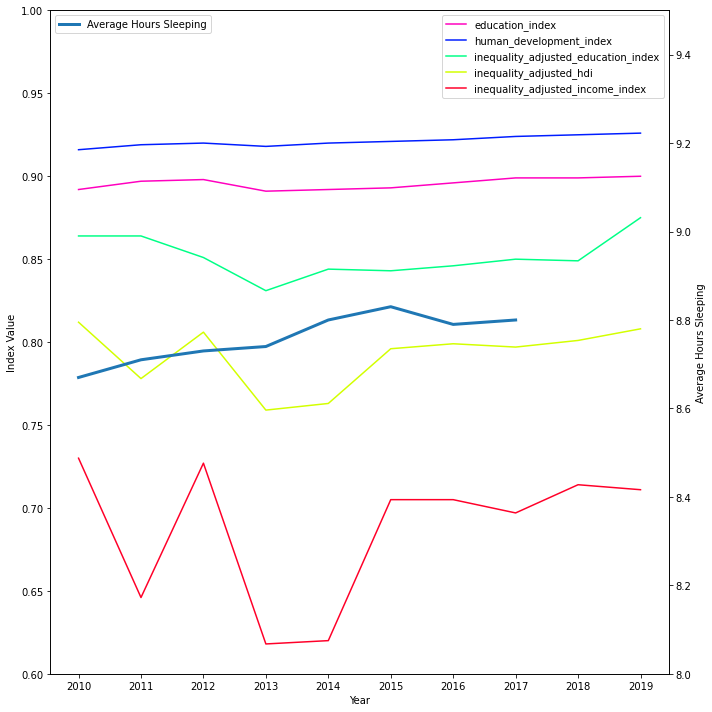

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

index_df.plot.line(ax = ax, cmap = 'gist_rainbow_r')
ax.set_xlabel('Year')
ax.set_ylabel('Index Value')

bx = ax.twinx()
total_t['avg_hrs_day_sleeping'].plot.line(ax = bx , linewidth = 3)
bx.set_ylabel('Average Hours Sleeping')

# ax.legend(['Index Value', 'Total TASS'], loc='upper right')
bx.legend(['Average Hours Sleeping'], loc='upper left')
ax.set_ylim(0.6,1)
bx.set_ylim(8,9.5)
ax.set_xticks(index_df.index)
fig.tight_layout()
